In [17]:
from train import get_loaders
import yaml

In [18]:
with open('training_configs/dataset/eyes_sortingloss.yaml') as f:
    dl_config = yaml.safe_load(f)

In [19]:
dl_config['train_test_split_kwargs']['volumes_limit'] = 5

In [20]:
train_loader, test_loader = get_loaders(**dl_config)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 2.7 sec.


In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
%%time
bloat = train_loader.__iter__()

CPU times: user 22.2 ms, sys: 1.6 s, total: 1.63 s
Wall time: 1.69 s


In [23]:
%%time
batch = bloat.__next__()

CPU times: user 63.6 ms, sys: 42 ms, total: 106 ms
Wall time: 293 ms


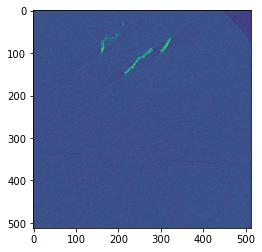

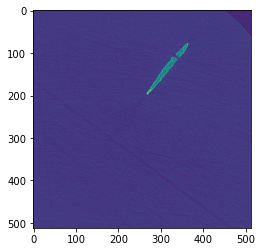

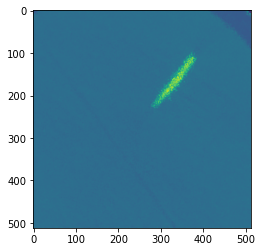

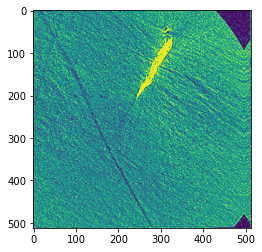

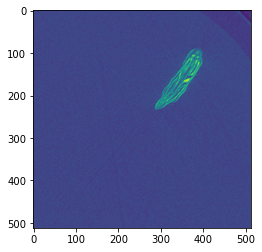

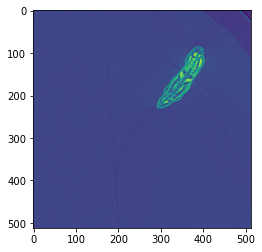

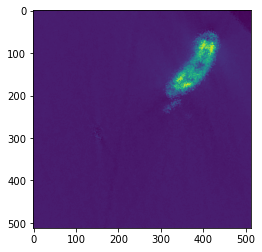

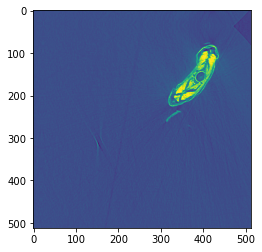

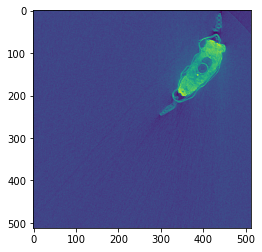

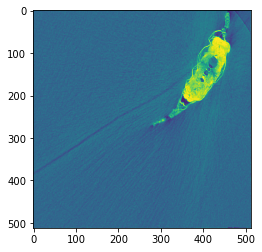

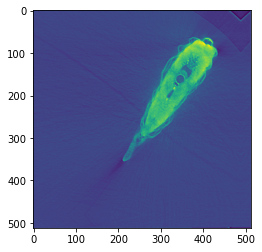

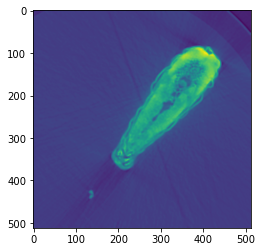

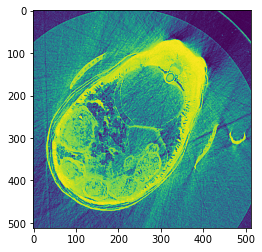

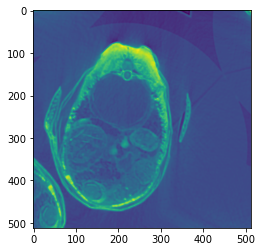

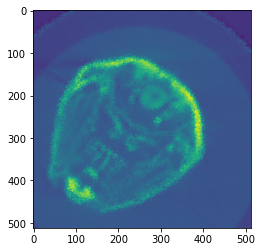

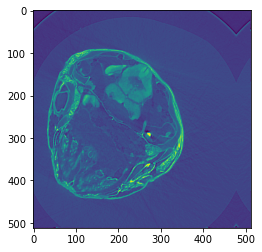

In [24]:
for img in batch[0]:
    plt.imshow(img[0])
    plt.show()

In [25]:
from train import get_criterion

In [26]:
with open('training_configs/criterion/sorting.yaml') as f:
    cr_config = yaml.safe_load(f)

In [27]:
criterion = get_criterion(**cr_config)

>>>>>>>>>>>>>>>> getting criterion
<<<<<<<<<<<<<<<< done in 0.00013 sec.


In [28]:
from train import get_model

In [29]:
with open('training_configs/model/eyes_sorting.yaml') as f:
    md_config = yaml.safe_load(f)

In [30]:
model = get_model(**md_config)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 11170755
<<<<<<<<<<<<<<<< done in 0.18 sec.


In [33]:
embedding = model(batch[0])
loss = criterion(embedding)
print(embedding, loss)

tensor([[-0.2773],
        [-0.2415],
        [-0.3202],
        [ 0.8106],
        [-0.1876],
        [-0.1094],
        [-0.2620],
        [-0.0272],
        [-0.0718],
        [ 0.0922],
        [-0.1649],
        [-0.1813],
        [ 0.9513],
        [-0.1474],
        [-0.1486],
        [ 0.2850]], grad_fn=<SelectBackward>) tensor(0.2272, grad_fn=<MeanBackward0>)
